In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns',60)

In [4]:
Loan_Stat=pd.read_csv(r'E:\personal_kazi\bajaj_finserv\LoanStats3a.csv\LoanStats3a.csv',skiprows=1)
Reject_Stat=pd.read_csv(r'E:\personal_kazi\bajaj_finserv\RejectStatsA.csv\RejectStatsA.csv',skiprows=1)

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print('The shape of Loan_Stat is ',Loan_Stat.shape)
print('The shape of Reject_Stat is ',Reject_Stat.shape)

The shape of Loan_Stat is  (42538, 144)
The shape of Reject_Stat is  (755491, 9)


In [6]:
Loan_Stat.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Loan_copy = Loan_Stat.copy()
Loan_Stat.shape

(42538, 144)

In [648]:
Loan_copy=Loan_copy[Loan_copy['loan_status']!="Does not meet the credit policy. Status:Fully Paid"]
Loan_copy=Loan_copy[Loan_copy['loan_status']!="Does not meet the credit policy. Status:Charged Off"]
Loan_copy['loan_status']=[0 if status =="Fully Paid" else 1 for status in Loan_copy['loan_status']]

In [9]:
Loan_copy=Loan_copy[(Loan_copy['loan_status']!="Does not meet the credit policy. Status:Fully Paid" )&(Loan_copy['loan_status']!="Does not meet the credit policy. Status:Charged Off")]

In [12]:
Loan_copy['loan_status'].value_counts()

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64

In [18]:
Loan_copy.drop([Loan_copy.count()<=30000]

[id                                            False
 member_id                                     False
 loan_amnt                                      True
 funded_amnt                                    True
 funded_amnt_inv                                True
 term                                           True
 int_rate                                       True
 installment                                    True
 grade                                          True
 sub_grade                                      True
 emp_title                                      True
 emp_length                                     True
 home_ownership                                 True
 annual_inc                                     True
 verification_status                            True
 issue_d                                        True
 loan_status                                    True
 pymnt_plan                                     True
 url                                          

In [650]:
zero_count_columns=Loan_copy.count()<=30000
Loan_copy.drop([index for index in zero_count_columns.index if zero_count_columns[index]==True],axis=1,inplace=True)

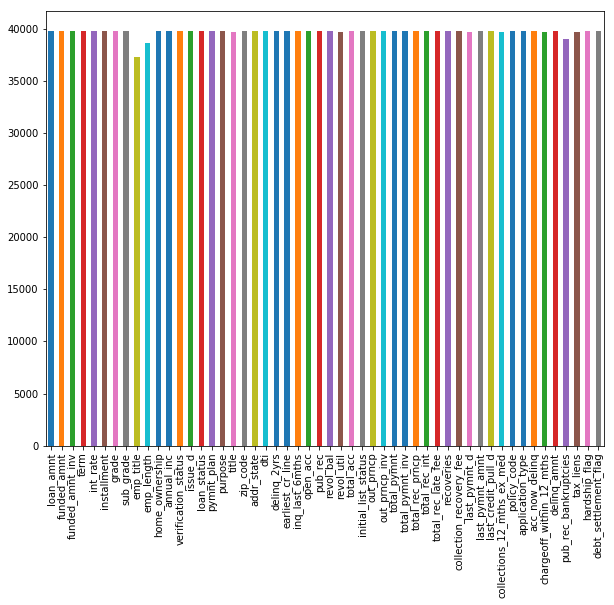

In [652]:
Loan_copy.count().plot(kind='bar',figsize=(10,8))

In [653]:
import re
int(re.findall(r'[0-9]+','< 10 years')[0])
# Loan_copy = Loan_Stat.copy()
Loan_copy['emp_length']=['0' if len=="< 1 year" else len for len in Loan_copy['emp_length']]
Loan_copy['emp_length'].dropna(axis=0,inplace=True)
Loan_copy=Loan_copy.loc[Loan_copy['emp_length'].index]

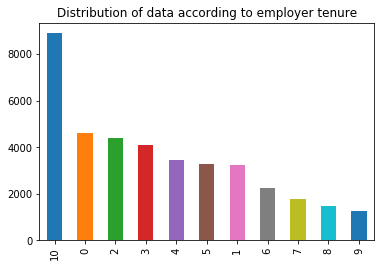

In [654]:
emp_length=Loan_copy['emp_length'].apply(lambda l:int(re.findall(r'[0-9]+',l)[0]))
emp_length.value_counts().plot(kind='bar')
plt.title('Distribution of data according to employer tenure')
Loan_copy['emp_length']=emp_length

In [733]:
Loan_copy.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39776, 39777, 39778, 39779, 39780, 39781, 39782, 39783, 39784,
            39785],
           dtype='int64', length=38708)

In [737]:
Loan_copy['issue_d']=Loan_Stat.loc[Loan_copy.index].dropna(axis=1)['issue_d']

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [663]:
#checking relationships with home_ownership with loan_status
rent_status=Loan_copy[Loan_copy['home_ownership']=='RENT']['loan_status']
mortgage_status=Loan_copy[Loan_copy['home_ownership']=='MORTGAGE']['loan_status']
stats.ttest_ind(rent_status,mortgage_status)

Ttest_indResult(statistic=4.6966621270651014, pvalue=2.6542855917707675e-06)

In [664]:
Loan_copy=Loan_copy.join(pd.get_dummies(Loan_copy['home_ownership']))
Loan_copy.drop(['home_ownership'],axis=1,inplace=True)

In [665]:
Loan_copy['int_rate'] = Loan_copy['int_rate'].apply(lambda l : float(re.findall(r'[0-9]+.[0-9]+',l)[0]))

In [666]:
rent_status=Loan_copy[Loan_copy['grade']=='A']['loan_status']
mortgage_status=Loan_copy[Loan_copy['grade']=='C']['loan_status']
stats.ttest_ind(rent_status,mortgage_status)

Ttest_indResult(statistic=-23.108299812987127, pvalue=2.0413887509629365e-116)

In [667]:
Loan_copy=Loan_copy.join(pd.get_dummies(Loan_copy['grade']))
Loan_copy.drop(['grade','sub_grade'],axis=1,inplace=True)

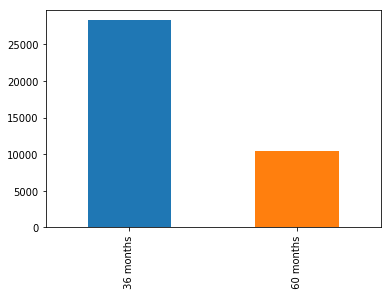

In [674]:
Loan_copy.term.value_counts().plot(kind='bar')

In [709]:
avg_pass=Loan_copy[Loan_copy.loan_status==0].mean()


In [710]:
avg_fail=Loan_copy[Loan_copy.loan_status==1].mean()

In [711]:
diff=pd.DataFrame((avg_pass-avg_fail))

In [715]:
diff[diff!=0].dropna(axis=0).index

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'A', 'B', 'C', 'D', 'E',
       'F', 'G'],
      dtype='object')

In [716]:
Loan_copy=Loan_copy[diff[diff!=0].dropna(axis=0).index]

In [726]:
Loan_copy.drop('pub_rec_bankruptcies',axis=1,inplace=True)

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [727]:
np.sum(Loan_copy[Loan_copy.pub_rec_bankruptcies.isnull()]['loan_status']==1)

AttributeError: 'DataFrame' object has no attribute 'pub_rec_bankruptcies'

In [738]:
Loan_copy.to_pickle(r'C:\Users\Kazi\Desktop\Python Development\New Dev\Loan_Stat_ml_2.pickle')

In [731]:
Loan_Stat[Loan_copy]

ValueError: Must pass DataFrame with boolean values only

In [ ]:
['loan_amnt', 'int_rate', 'installment', 'emp_length','delinq_2yrs',
       'annual_inc','delinq_2yrs' ,'issue_d', 'loan_status', 'dti', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT']

In [417]:
# Loan_copy.drop(['emp_title','pymnt_plan','earliest_cr_line','last_pymnt_d','hardship_flag'],axis=1,inplace=True)
Loan_copy.drop(['earliest_cr_line','last_pymnt_d','hardship_flag'],axis=1,inplace=True)

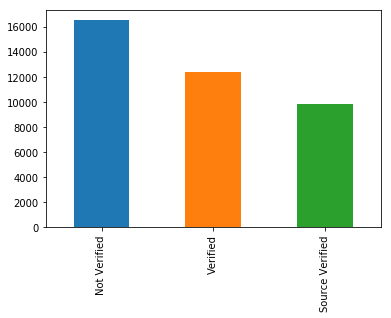

In [412]:
Loan_copy['verification_status'].value_counts().plot(kind='bar')


In [77]:
rent_status=Loan_copy[Loan_copy['verification_status']=='Not Verified']['loan_status']
mortgage_status=Loan_copy[Loan_copy['verification_status']=='Verified']['loan_status']
stats.ttest_ind(rent_status,mortgage_status)

Ttest_indResult(statistic=-8.602033724640316, pvalue=8.221392595628466e-18)

In [414]:
Loan_copy=Loan_copy.join(pd.get_dummies(Loan_copy['verification_status']))
Loan_copy.drop(['verification_status'],axis=1,inplace=True)

In [415]:
wa=Loan_copy[Loan_copy['addr_state']=='WA']['loan_status']
plt.show()
va=Loan_copy[Loan_copy['addr_state']=='VT']['loan_status']
print(stats.ttest_ind(wa,va))
#data is not much dependent on geographic region thus can be removed
Loan_copy.drop(['addr_state','purpose','title','zip_code'],axis=1,inplace=True)

Ttest_indResult(statistic=0.7107836916050932, pvalue=0.4774112270033397)


In [420]:
Loan_copy.drop('delinq_2yrs',axis=1,inplace=True)
Loan_copy.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,issue_d,loan_status,dti,A,B,C,D,E,F,G,Not Verified,Source Verified,Verified
0,5000.0,1,10.65,162.87,10,RENT,24000.0,Dec-2011,0,27.65,0,1,0,0,0,0,0,0,0,1
1,2500.0,0,15.27,59.83,0,RENT,30000.0,Dec-2011,1,1.00,0,0,1,0,0,0,0,0,1,0
2,2400.0,1,15.96,84.33,10,RENT,12252.0,Dec-2011,0,8.72,0,0,1,0,0,0,0,1,0,0
3,10000.0,1,13.49,339.31,10,RENT,49200.0,Dec-2011,0,20.00,0,0,1,0,0,0,0,0,1,0
4,3000.0,0,12.69,67.79,1,RENT,80000.0,Dec-2011,0,17.94,0,1,0,0,0,0,0,0,1,0


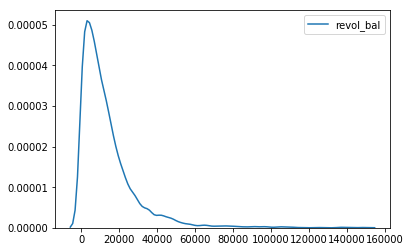

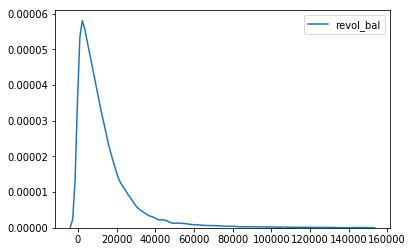

In [404]:
# print(stats.ttest_ind(Loan_copy[Loan_copy.loan_status==1]['inq_last_6mths'],Loan_copy[Loan_copy.loan_status==0]['inq_last_6mths']))

#delinq_2yrs is an important feature

# print(Loan_copy[Loan_copy.loan_status==1]['dti'].value_counts())
sns.kdeplot(Loan_copy[Loan_copy.loan_status==1]['revol_bal'])
plt.show()
# sns.kdeplot(c,bw=2.1)
sns.kdeplot(Loan_copy[Loan_copy.loan_status==0]['revol_bal'])
Loan_copy.drop(['open_acc','pub_rec','revol_bal','inq_last_6mths','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','debt_settlement_flag','tax_liens',\
'acc_now_delinq','pub_rec_bankruptcies','delinq_amnt','chargeoff_within_12_mths','application_type','policy_code','collections_12_mths_ex_med',\
'last_credit_pull_d','last_pymnt_amnt','total_pymnt','total_pymnt_inv','collection_recovery_fee','total_rec_prncp','total_rec_int','total_rec_late_fee',\
'recoveries','funded_amnt','funded_amnt_inv'],axis=1,inplace=True)
# Loan_copy.drop(['revol_util'],axis=1,inplace=True)

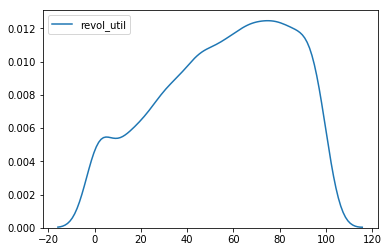

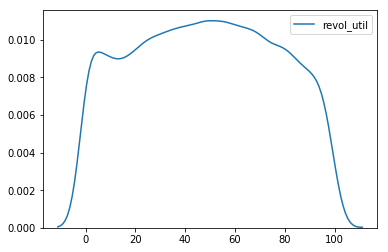

In [1015]:
# Loan_copy['revol_util']=Loan_copy['revol_util'].apply(lambda l:float(re.findall(r'[0-9].[0-9]+',l)[0]))
emp_l=Loan_copy[(~Loan_copy['revol_util'].isnull())]['revol_util']
#apply(lambda l:float(re.findall(r'[0-9]+.[0-9]+',l)[0]))
emp_l=pd.DataFrame(emp_l)
emp_l['revol_util']= emp_l['revol_util'].apply(lambda l : l.split('%')[0])
emp_l['revol_util'].astype('float')
# re.findall(r'[0-9]+.[0-9]+','10.3%')[0]

plt.show()
# sns.kdeplot(c,bw=2.1)
# sns.kdeplot(Loan_copy[Loan_copy.loan_status==0]['revol_bal'])
d=Loan_copy.loc[(emp_l.index)][['revol_util','loan_status']]
d['revol_util']= d['revol_util'].apply(lambda l : l.split('%')[0])
d['revol_util'].astype('float')
sns.kdeplot(d[d.loan_status==1]['revol_util'])
plt.show()
sns.kdeplot(d[d.loan_status==0]['revol_util'])

In [1095]:
Loan_copy.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

Ttest_indResult(statistic=-46.1960699990096, pvalue=0.0)


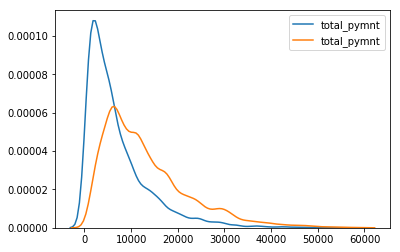

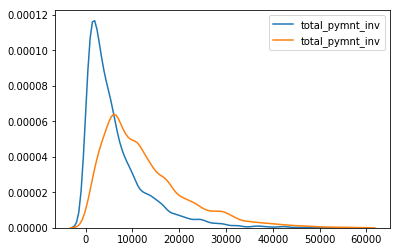

In [1041]:
print(stats.ttest_ind(Loan_copy[Loan_copy.loan_status==1]['total_pymnt_inv'],Loan_copy[Loan_copy.loan_status==0]['total_pymnt_inv']))
sns.kdeplot(Loan_copy[Loan_copy.loan_status==1]['total_pymnt'])
# plt.plot()
sns.kdeplot(Loan_copy[Loan_copy.loan_status==0]['total_pymnt'])
plt.show()
sns.kdeplot(Loan_copy[Loan_copy.loan_status==1]['total_pymnt_inv'])
plt.plot()
sns.kdeplot(Loan_copy[Loan_copy.loan_status==0]['total_pymnt_inv'])


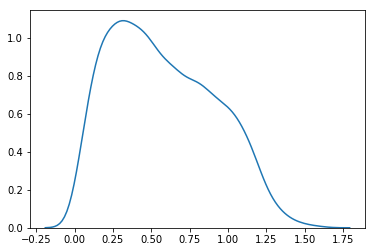

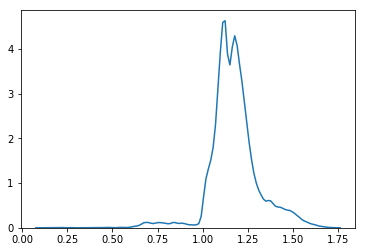

In [1048]:
sns.kdeplot(Loan_copy[Loan_copy.loan_status==1]['total_pymnt']/Loan_copy[Loan_copy.loan_status==1]['loan_amnt'])
plt.show()
sns.kdeplot(Loan_copy[Loan_copy.loan_status==0]['total_pymnt']/Loan_copy[Loan_copy.loan_status==0]['loan_amnt'])
#cant decide as I do not know the no of months left to pay

C:\Users\Kazi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Kazi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


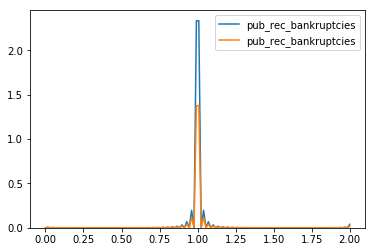

In [1058]:
sns.kdeplot(Loan_copy[Loan_copy.loan_status==1]['pub_rec_bankruptcies'])
plt.plot()
sns.kdeplot(Loan_copy[Loan_copy.loan_status==0]['pub_rec_bankruptcies'])

In [423]:
Loan_copy.head(15)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,A,B,C,D,E,F,G,Not Verified,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT
0,5000.0,1,10.65,162.87,10,24000.0,Dec-2011,0,27.65,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2500.0,0,15.27,59.83,0,30000.0,Dec-2011,1,1.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,2400.0,1,15.96,84.33,10,12252.0,Dec-2011,0,8.72,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,10000.0,1,13.49,339.31,10,49200.0,Dec-2011,0,20.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,3000.0,0,12.69,67.79,1,80000.0,Dec-2011,0,17.94,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
5,5000.0,1,7.90,156.46,3,36000.0,Dec-2011,0,11.20,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6,7000.0,0,15.96,170.08,8,47004.0,Dec-2011,0,23.51,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7,3000.0,1,18.64,109.43,9,48000.0,Dec-2011,0,5.35,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
8,5600.0,0,21.28,152.39,4,40000.0,Dec-2011,1,5.55,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
9,5375.0,0,12.69,121.45,0,15000.0,Dec-2011,1,18.08,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [30]:
Loan_copy[Loan_copy.loan_status==0].shape

(33268, 23)

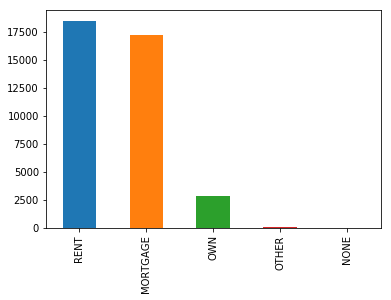

In [731]:
# # Loan_copy['emp_length']=emp_length  #emp_title pymnt_plan
# #[i if Loan_copy['home_ownership'].isnull()[i] == True 
# count_true = Loan_copy['home_ownership'].isnull()
# Loan_copy.drop([i for i in count_true.index.values if count_true[i] == True  ],inplace=True)
# np.sum(Loan_copy['home_ownership'].isnull())
# Loan_copy['home_ownership'].value_counts().plot(kind='bar')

In [803]:

stats.ttest_ind(rent_status,mortgage_status)
#correlatioin between home_ownership and loan_status
# mortgage_status.shape

Ttest_indResult(statistic=4.6966621270651014, pvalue=2.6542855917707675e-06)

In [406]:
#dropping columns not required
Loan_copy.drop(['emp_title','pymnt_plan'],axis=1,inplace=True)

In [729]:
Loan_copy.shape

(38708, 50)

In [671]:
Loan_copy['home_ownership'].value_counts()

4    18507
0    17255
3     2845
2       98
1        3
Name: home_ownership, dtype: int64

In [789]:
pd.get_dummies(Loan_Stat['home_ownership']).shape

(42538, 5)

In [777]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
d= pd.DataFrame()
ohe = OneHotEncoder(sparse=False)
le = LabelEncoder()

Loan_copy['home_ownership']=le.fit_transform(Loan_copy['home_ownership'])
d['home_ownership']=Loan_copy['home_ownership']
d.index.name='serial_number'
# d[['home_ownership_0','home_ownership_1','home_ownership_2','home_ownership_3','home_ownership_4']] = 
f=pd.DataFrame(ohe.fit_transform(d['home_ownership'].values.reshape(-1,1)))
# f.index.name='serial_number'
# f.index=d.index
# d.join(f)
new_cols = ('home_ownership '*len(f.columns)).split()
# for i in range(len(new_cols)):
#     f.columns[i]=new_cols[i]
# for i in range()
# for i in range(len(f.columns)):
#     f.columns[i]=('home_ownership '*len(f.columns)).split()[i]
f.columns=('home_ownership '*len(f.columns)).split()

In [743]:
test = Loan_copy[['home_ownership','home_ownership']]

In [674]:
def one_ho_encoding(sample):
    sample = [[0],[4],[2],[2]]
    sample = np.array(sample).reshape(len(sample))

    return np.eye(sample.max()+1)[sample]

In [271]:
f=pd.DataFrame(ohe.fit_transform(d['home_ownership'].values.reshape(-1,1)))
f.index.name='serial_number'
f.columns=['0','1','2','d','e']


In [273]:
# d.rename('serial_number')
d.index.name='serial_number'
d.join(f)

,home_ownership,a,b,c,d,e
serial_number,,,,,,
0,4,0.0,0.0,0.0,0.0,1.0
1,4,0.0,0.0,0.0,0.0,1.0
2,4,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,0.0,0.0,1.0
4,4,0.0,0.0,0.0,0.0,1.0
5,4,0.0,0.0,0.0,0.0,1.0
6,4,0.0,0.0,0.0,0.0,1.0
7,4,0.0,0.0,0.0,0.0,1.0
8,3,0.0,0.0,0.0,1.0,0.0


Text(0.5,1,'4:Rent,3: OWN , 2:Other,1:None,0:Mortgage')

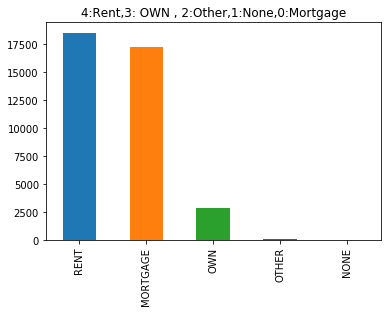

In [602]:
Loan_copy['home_ownership'].value_counts().plot(kind='bar')
plt.title('4:Rent,3: OWN , 2:Other,1:None,0:Mortgage')


In [715]:
verified_status = ["Not Verified" if i=="Not Verified" else "Verified" for i in Loan_copy['verification_status'] ]
Loan_copy['verification_status']=verified_status

In [716]:
Loan_copy[Loan_copy['verification_status']=='Verified']['loan_status']
# Loan_copy['verification_status'].value_counts()
# Loan_copy['verification_status'].value_counts()
# Loan_copy.drop(['verification_status'],axis=1,inplace=True)

0        0
1        1
3        0
4        0
5        0
7        0
8        1
9        1
11       0
12       1
13       0
14       1
18       0
20       0
21       1
22       0
25       0
29       0
30       0
31       0
32       0
33       0
34       0
36       0
37       0
38       0
39       0
40       0
46       1
47       0
        ..
38703    0
38708    0
38711    0
38717    0
38720    0
38722    0
38753    0
38774    0
38779    0
38792    0
38846    1
38877    0
38880    1
38896    1
38905    0
38906    0
38909    1
38934    0
38939    0
38947    0
38955    0
38959    0
38982    1
38983    0
38986    1
38987    0
38992    0
39786    1
42536    1
42537    1
Name: loan_status, Length: 22863, dtype: int64

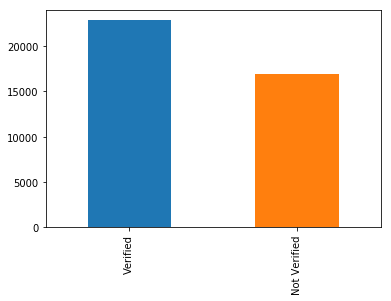

In [717]:
Loan_copy['verification_status'].value_counts().plot(kind='bar')

In [344]:
Loan_copy['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [380]:
# Loan_copy['loan_status']=[0 if len(re.findall(r'Fully Paid',word))==0 else 1 for word in Loan_copy['loan_status']]
# Loan_copy['loan_status'].value_counts().plot(kind='bar')
Loan_copy=Loan_copy[Loan_copy['loan_status']!="Does not meet the credit policy. Status:Fully Paid"]
Loan_copy=Loan_copy[Loan_copy['loan_status']!="Does not meet the credit policy. Status:Charged Off"]
Loan_copy['loan_status']=[0 if status =="Fully Paid" else 1 for status in Loan_copy['loan_status']]
# Loan_copy['loan_status'].value_counts()

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64

In [707]:

#


Ttest_indResult(statistic=-30.100314483358584, pvalue=8.986221929873086e-197)

In [709]:
# Loan_copy['term']=Loan_copy['term'].apply(lambda l : int(re.findall(r'[0-9]+',l)[0]))
from scipy import stats
# stats.ttest_ind()
status_36 = Loan_copy[Loan_copy['term']==36]['loan_status']
status_60 = Loan_copy[Loan_copy['term']==60]['loan_status']
stats.ttest_ind(status_36,status_60)
#null hypothesis term insurance doesn't have a correlation with loan_status. p value less than 0.05. rejected. thus loan tenure has an effect on 

Ttest_indResult(statistic=-30.100314483358584, pvalue=8.986221929873086e-197)

In [523]:
def important_fields(Loan_copy,thres=0.5):
    filter_correlated=Loan_copy.corr()
    # filter_correlated=correlated[correlated>=0.5]
    rows = filter_correlated.index
    important_fields = dict()
    for row in rows:
        select=filter_correlated.loc[row] > thres
        cols = select.index
        important_fields[row]=[cols[col] for col in range(len(cols)) if select[col]==True and row!=cols[col]]
    #     return pd.DataFrame(important_fields)
    keys = important_fields.keys()
    remove=[]
    for key in keys:
        if len(important_fields[key])==0:
            remove.append(key)
    for item in remove:
        del important_fields[item]
    return important_fields,remove

In [546]:
keep,delete=important_fields(Loan_copy,0.1)
print(keep.keys())
print(len(keep.keys()))
print("#####")
print(delete)
# Loan_copy['tax_liens'].value_counts()

dict_keys(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'])
25
#####
[]


In [551]:
# Loan_copy.drop(delete,axis=1,inplace=True)
list(keep.keys())

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

In [424]:
Loan_copy.head()
Loan_copy.to_pickle(r'C:\Users\Kazi\Desktop\Python Development\New Dev\Loan_Stat_ml_1.pickle')

In [614]:
Loan_copy=pd.read_pickle(r'C:\Users\Kazi\Desktop\Python Development\New Dev\Loan_Stat_ml_1.pickle')

In [615]:
Loan_copy['issue_d'] = Loan_copy['issue_d'].apply(lambda l : re.findall(r'[0-9]+',l)[0])

In [616]:
Loan_test_2008=Loan_copy[Loan_copy.issue_d=='2008']
Loan_test_2008.drop('issue_d',axis=1,inplace=True)

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [617]:
Loan_test_2008.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,A,B,C,D,E,F,G,Not Verified,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT
37968,1200.0,1,8.00,37.61,0,40000.0,0,7.26,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
37969,8600.0,1,11.26,282.63,10,50000.0,1,2.88,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
37970,15000.0,1,12.84,504.27,6,182500.0,0,20.69,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
37972,8000.0,1,12.21,266.52,8,45000.0,0,21.87,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
37973,3000.0,1,9.32,95.85,0,24856.0,0,18.01,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [618]:
Loan_copy=Loan_copy[Loan_copy.issue_d!='2008']
Loan_copy.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,A,B,C,D,E,F,G,Not Verified,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT
0,5000.0,1,10.65,162.87,10,24000.0,2011,0,27.65,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2500.0,0,15.27,59.83,0,30000.0,2011,1,1.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,2400.0,1,15.96,84.33,10,12252.0,2011,0,8.72,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,10000.0,1,13.49,339.31,10,49200.0,2011,0,20.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,3000.0,0,12.69,67.79,1,80000.0,2011,0,17.94,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [619]:
Loan_copy.drop('issue_d',axis=1,inplace=True)

In [408]:
Loan_copy['term']=pd.get_dummies(Loan_copy['term'])

In [620]:
Loan_copy[Loan_copy.loan_status==1].shape[0]/Loan_copy.shape[0]*100

13.979970925537069

In [85]:
Loan_copy[['loan_amnt','int_rate','dti','annual_inc']].corr()

,loan_amnt,int_rate,dti,annual_inc
loan_amnt,1.000000,0.308692,0.066232,0.268627
int_rate,0.308692,1.000000,0.112561,0.050607
dti,0.066232,0.112561,1.000000,-0.124515
annual_inc,0.268627,0.050607,-0.124515,1.000000


In [588]:
Loan_test_2008.head()
# we can do some more categorical interdependence using chisquare test. will try later

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti
37968,1200.0,1,8.00,37.61,0,40000.0,0,7.26
37969,8600.0,1,11.26,282.63,10,50000.0,1,2.88
37970,15000.0,1,12.84,504.27,6,182500.0,0,20.69
37972,8000.0,1,12.21,266.52,8,45000.0,0,21.87
37973,3000.0,1,9.32,95.85,0,24856.0,0,18.01


In [456]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
import xgboost
import lightgbm

In [587]:
# Loan_copy.drop(['A','B','C','D','E','F','G','Not Verified','Source Verified','Verified','MORTGAGE','NONE','OTHER','OWN','RENT'],axis=1,inplace=True)
Loan_test_2008.drop(['A','B','C','D','E','F','G','Not Verified','Source Verified','Verified','MORTGAGE','NONE','OTHER','OWN','RENT'],axis=1,inplace=True)

In [635]:
# xgb = xgboost.XGBClassifier(learning_rate=0.03,max_depth=20,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.6,reg_lambda=0.7)
xgb = xgboost.XGBClassifier(reg_alpha=0.8,reg_lambda=0.7,n_estimators=100)
gbc=lightgbm.LGBMClassifier(class_weight='balanced',learning_rate=0.01,n_estimators=150)
xgb.fit(X_train,y_train['loan_status'])
y_pred=xgb.predict(X_test)
metrics.roc_auc_score(y_test['loan_status'],y_pred)

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


0.5055124947628766

In [466]:
xgbR = xgboost.XGBRFClassifier(max_depth=20)
xgbR.fit(X_train,y_train['loan_status'])
y_pred=xgbR.predict(X_test)
metrics.roc_auc_score(y_test['loan_status'],y_pred)

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


0.9157476285889443

In [595]:
rf.oob_score_

0.9678233315077067

In [477]:
stack_data_train = pd.concat([pd.Series(rf.predict(X_train)),pd.Series(xgb.predict(X_train)),pd.Series(xgbR.predict(X_train)),pd.Series(y_train['loan_status'].values)],axis=1)
stack_data_test = pd.concat([pd.Series(rf.predict(X_test)),pd.Series(xgb.predict(X_test)),pd.Series(xgbR.predict(X_test)),pd.Series(y_test['loan_status'].values)],axis=1)

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

In [469]:
log_reg.fit(stack_data_train[[0,1,2]],stack_data_train[3])

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [470]:
x=stack_data_test[[0,1,2]]
y=stack_data_test[3]
# log_reg.predict(stack_data_test[[0,1,2]],])
y_pred=log_reg.predict(x)

In [471]:
metrics.roc_auc_score(y,y_pred)

0.9702742914166964

In [472]:
print(metrics.classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      6392
          1       0.95      0.99      0.97      6390

avg / total       0.97      0.97      0.97     12782



In [591]:
Loan_test_2008[i if i not in ['loan_status'] for i in Loan_test_2008.columns]
#rf.predict(Loan_test_2008)

SyntaxError: invalid syntax (<ipython-input-591-a746c381a38e>, line 1)

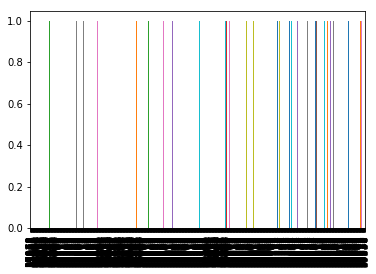

In [513]:
Y_true.T.plot(kind='bar')

In [592]:
Y_true = pd.DataFrame(Loan_test_2008['loan_status'])
Loan_test_2008.drop('loan_status',axis=1,inplace=True)
Loan_test_2008.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti
37968,1200.0,1,8.00,37.61,0,40000.0,7.26
37969,8600.0,1,11.26,282.63,10,50000.0,2.88
37970,15000.0,1,12.84,504.27,6,182500.0,20.69
37972,8000.0,1,12.21,266.52,8,45000.0,21.87
37973,3000.0,1,9.32,95.85,0,24856.0,18.01


In [611]:
Loan_test_2008.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti
37968,1200.0,1,8.00,37.61,0,40000.0,7.26
37969,8600.0,1,11.26,282.63,10,50000.0,2.88
37970,15000.0,1,12.84,504.27,6,182500.0,20.69
37972,8000.0,1,12.21,266.52,8,45000.0,21.87
37973,3000.0,1,9.32,95.85,0,24856.0,18.01


In [609]:
print(metrics.roc_auc_score(rf.predict(Loan_test_2008),Y_true['loan_status']) )

print(metrics.roc_auc_score(xgb.predict(Loan_test_2008),Y_true['loan_status']) )

0.5581168831168831
0.5185852628513179


C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


In [504]:
rf.predict(Loan_test_2008.iloc[2].reshape(1,-1))

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([0], dtype=int64)

In [489]:
stack_data_2008 = pd.concat([pd.Series(rf.predict(Loan_test_2008)),pd.Series(xgb.predict(Loan_test_2008)),pd.Series(xgbR.predict(Loan_test_2008)),pd.Series(Y_true.values)],axis=1)

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)
C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)


In [491]:
x=stack_data_2008[[0,1,2]]
y=stack_data_2008[3]
# log_reg.predict(stack_data_test[[0,1,2]],])
y_pred=log_reg.predict(x)
metrics.roc_auc_score(y,y_pred)

0.5003586767445082

In [621]:
df_pass = Loan_copy[Loan_copy.loan_status==0]
df_fail = Loan_copy[Loan_copy.loan_status==1]

In [622]:
seed=1
df_fail_upsampled = resample(df_fail,replace=True,n_samples=df_pass.shape[0],random_state=seed)
df_pass_downsampled = resample(df_pass,replace=True,n_samples=df_fail.shape[0],random_state=seed)

In [539]:
log_reg = LogisticRegression(random_state=seed,class_weight='balanced')

In [623]:
df_upsampled=pd.concat([df_pass,df_fail_upsampled])
df_downsampled = pd.concat([df_pass_downsampled,df_fail])

In [624]:
df_upsampled['keys']=range(df_upsampled.shape[0])
df_upsampled.set_index('keys',inplace=True)

In [625]:
X_train,X_test=train_test_split(df_upsampled,test_size=0.2)

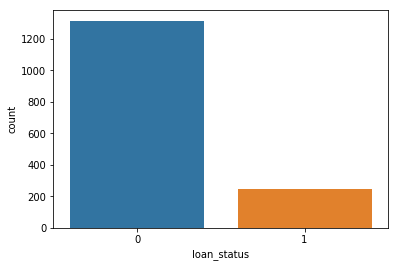

In [629]:
sns.countplot('loan_status',data=Loan_test_2008)

In [604]:
y_train = pd.DataFrame(X_train['loan_status'])
X_train.drop(['loan_status','issue_d'],axis=1,inplace=True)
y_test = pd.DataFrame(X_test['loan_status'])
X_test.drop(['loan_status','issue_d'],axis=1,inplace=True)

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [630]:
X_train.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,A,B,C,D,E,F,G,Not Verified,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT
keys,,,,,,,,,,,,,,,,,,,,,,,
10687,5850.0,1,9.99,188.74,6,44000.0,0,8.86,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
38109,16000.0,0,16.89,396.70,6,28056.0,1,5.77,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
53204,8500.0,1,5.42,256.36,10,60000.0,1,25.88,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
31405,2000.0,1,13.16,67.55,10,26500.0,0,14.54,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
38964,12000.0,1,9.91,386.70,10,55000.0,1,13.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [536]:
y_train.head()

,loan_status
19932,0
28681,0
10593,0
16392,0
27053,0


In [540]:
log_reg.fit(X_train,y_train)

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return array


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [541]:
y_pred=log_reg.predict(X_test)

In [542]:
print('ROC-AUC score when tested on imbalanced data ',metrics.roc_auc_score(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

ROC-AUC score when tested on imbalanced data  0.6338778051725874


array([[4053, 2331],
       [ 384,  662]], dtype=int64)

In [1147]:
print('ROC-AUC score when tested on upsampled data ',metrics.roc_auc_score(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

ROC-AUC score when tested on upsampled data  0.6201883530916917


array([[3498, 3137],
       [1914, 4759]], dtype=int64)

In [1152]:
print('ROC-AUC score when tested on downsampled data ',metrics.roc_auc_score(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

ROC-AUC score when tested on downsampled data  0.6166062284976883


array([[638, 471],
       [365, 702]], dtype=int64)

In [ ]:
svc=SVC(kernel='linear',class_weight='balanced',probability=True,random_state=seed)
svc.fit(X_train,y_train)

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [606]:
rf = RandomForestClassifier(random_state=seed,n_estimators=150,oob_score=True,class_weight='balanced')
rf.fit(X_train,y_train['loan_status'])
y_pred=rf.predict(X_test)
print('ROC-AUC score when tested on upsampled data ',metrics.roc_auc_score(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

ROC-AUC score when tested on upsampled data  0.9693235066387824


array([[6095,  339],
       [  55, 6293]], dtype=int64)

In [191]:
accuracy={}

In [201]:
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_test,y_test['loan_status'])
    y_pred=knn.predict(X_test)
    accuracy[i]=metrics.roc_auc_score(y_test['loan_status'],y_pred)

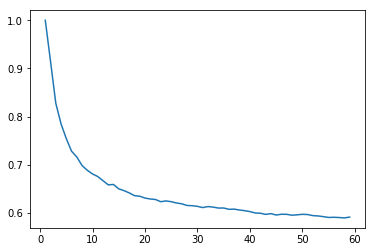

In [202]:
plt.plot(pd.DataFrame(accuracy,index=[0]).T)

In [151]:
metrics.f1_score(y_test,y_pred)

0.9397962112514352

In [152]:
rf.oob_score_

0.9307131584880138

In [29]:
rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state')

In [66]:
print('Out of bag accuracy is',rf.oob_score_*100)
#coming close to accuracy of training. unseen data and thus confirms generalization

Out of bag accuracy is 95.57563688284361


In [12]:
y_pred=rf.predict(X_test)
print('ROC-AUC score when tested on downsampled data ',metrics.roc_auc_score(y_test,y_pred))

ROC-AUC score when tested on downsampled data  0.9620717921789464


In [28]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'delinq_2yrs', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not Verified', 'Source Verified',
       'Verified'],
      dtype='object')

In [29]:
feature_importance = pd.DataFrame(rf.feature_importances_,index=X_train.columns)

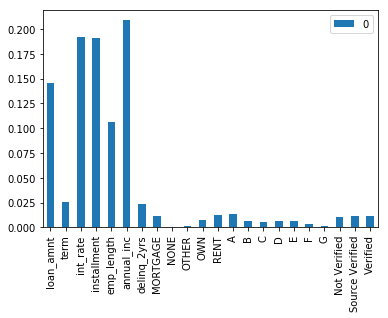

In [31]:
feature_importance.plot(kind='bar')


In [32]:
sel = SelectFromModel(rf)
sel.fit(X_train,y_train)

C:\Users\Kazi\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [33]:
X_train.columns[sel.get_support()]

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc'], dtype='object')

In [ ]:
RandomForestClassifier()

In [15]:
param_grids={
                'n_estimators':[50,100],
                'max_depth' : [5,6,7],
                'criterion' : ['gini','entropy'],
                'max_features' : ['auto','log2','sqrt']
            }

In [17]:
cv_rf = GridSearchCV(estimator=rf,param_grid=param_grids,cv=5)

In [18]:
cv_rf.fit(X_train,y_train['loan_status'])

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100], 'max_depth': [5, 6, 7], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
cv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 50}

In [30]:
rf= RandomForestClassifier(n_estimators=50,max_features='auto',criterion='entropy',oob_score=True,random_state=seed)

In [31]:
rf.fit(X_train,y_train['loan_status'])
y_pred=rf.predict(X_test)
metrics.accuracy_score(y_test['loan_status'],y_pred)

0.9623534715960325

In [27]:
metrics.roc_auc_score(y_test['loan_status'],y_pred)

0.6466570601932888

In [96]:
index = [7484 38743]
rf.fit(X_train.loc[index],y_train.loc[index])

SyntaxError: invalid syntax (<ipython-input-96-d879b8db789f>, line 1)

In [134]:
train_index

array([ 5323,  5324,  5325, ..., 53225, 53226, 53227])

In [35]:
cv = KFold(n_splits=10,shuffle=False,random_state=1)

In [156]:
for train_index,test_index in cv.split(X_train,y_train):
    print('train index',train_index[:5])
    print('test index',test_index)

    rf = RandomForestClassifier(random_state=seed,n_estimators=50,oob_score=True)
    rf.fit(X_train.iloc[train_index],y_train.iloc[train_index]['loan_status'])
    y_pred=rf.predict(X_train.iloc[test_index])
    print('ROC-AUC score when tested on downsampled data ',metrics.roc_auc_score(y_train.iloc[test_index],y_pred))
    print('out of bag score ',rf.oob_score_)

train index [3993 3994 3995 3996 3997]
test index [   0    1    2 ... 3990 3991 3992]
ROC-AUC score when tested on downsampled data  0.9281250517448747
out of bag score  0.9166388332219996
train index [0 1 2 3 4]
test index [3993 3994 3995 ... 7982 7983 7984]
ROC-AUC score when tested on downsampled data  0.9305953453198821
out of bag score  0.9190904283447912
train index [0 1 2 3 4]
test index [ 7985  7986  7987 ... 11974 11975 11976]
ROC-AUC score when tested on downsampled data  0.931829645706477
out of bag score  0.9174483008154972
train index [0 1 2 3 4]
test index [11977 11978 11979 ... 15966 15967 15968]
ROC-AUC score when tested on downsampled data  0.9341861790938442
out of bag score  0.9182554482451502
train index [0 1 2 3 4]
test index [15969 15970 15971 ... 19958 19959 19960]
ROC-AUC score when tested on downsampled data  0.9247134828175032
out of bag score  0.9188399343148989
train index [0 1 2 3 4]
test index [19961 19962 19963 ... 23950 23951 23952]
ROC-AUC score when te

In [154]:
import imblearn

In [170]:
metrics.confusion_matrix(rf.predict(Loan_copy.drop('loan_status',axis=1)),Loan_copy['loan_status'])

array([[31475,   163],
       [ 1793,  5277]], dtype=int64)

In [203]:
import xgboost

In [307]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [308]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [309]:
std_scaler.fit(X_train)
min_max_scaler.fit(X_train)
X_train_std=pd.DataFrame(min_max_scaler.transform(X_train),index=X_train.index,columns=X_train.columns)


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,delinq_2yrs,MORTGAGE,NONE,OTHER,OWN,RENT,A,B,C,D,E,F,G,Not Verified,Source Verified,Verified
keys,,,,,,,,,,,,,,,,,,,,,,
49591,0.565217,0.0,0.502634,0.356487,1.0,0.011007,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
20280,0.420290,1.0,0.078504,0.243707,0.3,0.004830,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8995,0.565217,1.0,0.493678,0.523901,0.1,0.014676,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45445,0.884058,0.0,0.402529,0.535564,1.0,0.011841,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4051,0.710145,1.0,0.130664,0.594471,0.1,0.007672,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25968,0.275362,1.0,0.090622,0.227770,0.3,0.006137,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48710,0.298551,0.0,0.783983,0.211128,0.7,0.015177,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
52823,1.000000,1.0,0.466280,0.919062,1.0,0.011007,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36046,0.043478,1.0,0.070601,0.035556,1.0,0.009940,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [326]:
filtered_data=Loan_copy[['funded_amnt','funded_amnt_inv','term','installment','loan_status','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','delinq_amnt']]

In [332]:
sum=filtered_data filtered_data['total_rec_prncp'] + filtered_data['total_rec_int'] + filtered_data['delinq_amnt']

In [330]:
filtered_data.head()

,funded_amnt,funded_amnt_inv,term,installment,loan_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,delinq_amnt
0,5000.0,4975.0,36 months,162.87,0,5863.155187,5833.84,5000.00,863.16,0.0
1,2500.0,2500.0,60 months,59.83,1,1014.530000,1014.53,456.46,435.17,0.0
2,2400.0,2400.0,36 months,84.33,0,3005.666844,3005.67,2400.00,605.67,0.0
3,10000.0,10000.0,36 months,339.31,0,12231.890000,12231.89,10000.00,2214.92,0.0
4,3000.0,3000.0,60 months,67.79,0,4066.908161,4066.91,3000.00,1066.91,0.0


In [370]:

df=filtered_data.loc[pd.DataFrame((filtered_data[filtered_data['loan_status']==1]['term']*filtered_data[filtered_data['loan_status']==1]['installment'])).index]
ff=filtered_data[filtered_data['loan_status']==1]['term']*filtered_data[filtered_data['loan_status']==1]['installment']


In [372]:
df['total']=ff

In [377]:
Loan_copy

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.000000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-2011,0,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-2015,171.62,Dec-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.000000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-2011,1,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.90,1.1100,Apr-2013,119.66,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.000000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-2011,0,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-2014,649.91,Jun-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,10000.0,10000.0,10000.000000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,0,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-2015,357.48,Apr-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,3000.0,3000.0,3000.000000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-2011,0,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.00,0.0000,Jan-2017,67.30,Apr-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
5,5000.0,5000.0,5000.000000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,0,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-2015,161.03,Feb-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
6,7000.0,7000.0,7000.000000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-2011,0,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,7.0,0.0,17726.0,85.6%,11.0,f,0.0,0.0,10137.840008,10137.84,7000.00,3137.84,0.00,0.00,0.0000,May-2016,1313.76,Dec-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
7,3000.0,3000.0,3000.000000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-2011,0,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,4.0,0.0,8221.0,87.5%,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-2015,111.34,Dec-2014,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
8,5600.0,5600.0,5600.000000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-2011,1,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,11.0,0.0,5210.0,32.6%,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.0900,Apr-2012,152.39,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
9,5375.0,5375.0,5350.000000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-2011,1,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,2.0,0.0,9279.0,36.5%,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.5200,Nov-2012,121.45,Dec-2016

In [375]:
df['prec_paid']=df['total_pymnt']/df['total']*100

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [354]:

filtered_data['term']=filtered_data['term'].map(lambda l : int(re.findall(r'[0-9]+',l)[0]))

C:\Users\Kazi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [341]:
int(re.findall(r'[0-9]+','36 months')[0])

36

In [352]:
filtered_data=filtered_data[(~filtered_data['term'].isnull())]

In [383]:
Loan_copy.shape

(38708, 23)

In [389]:
Loan_copy.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

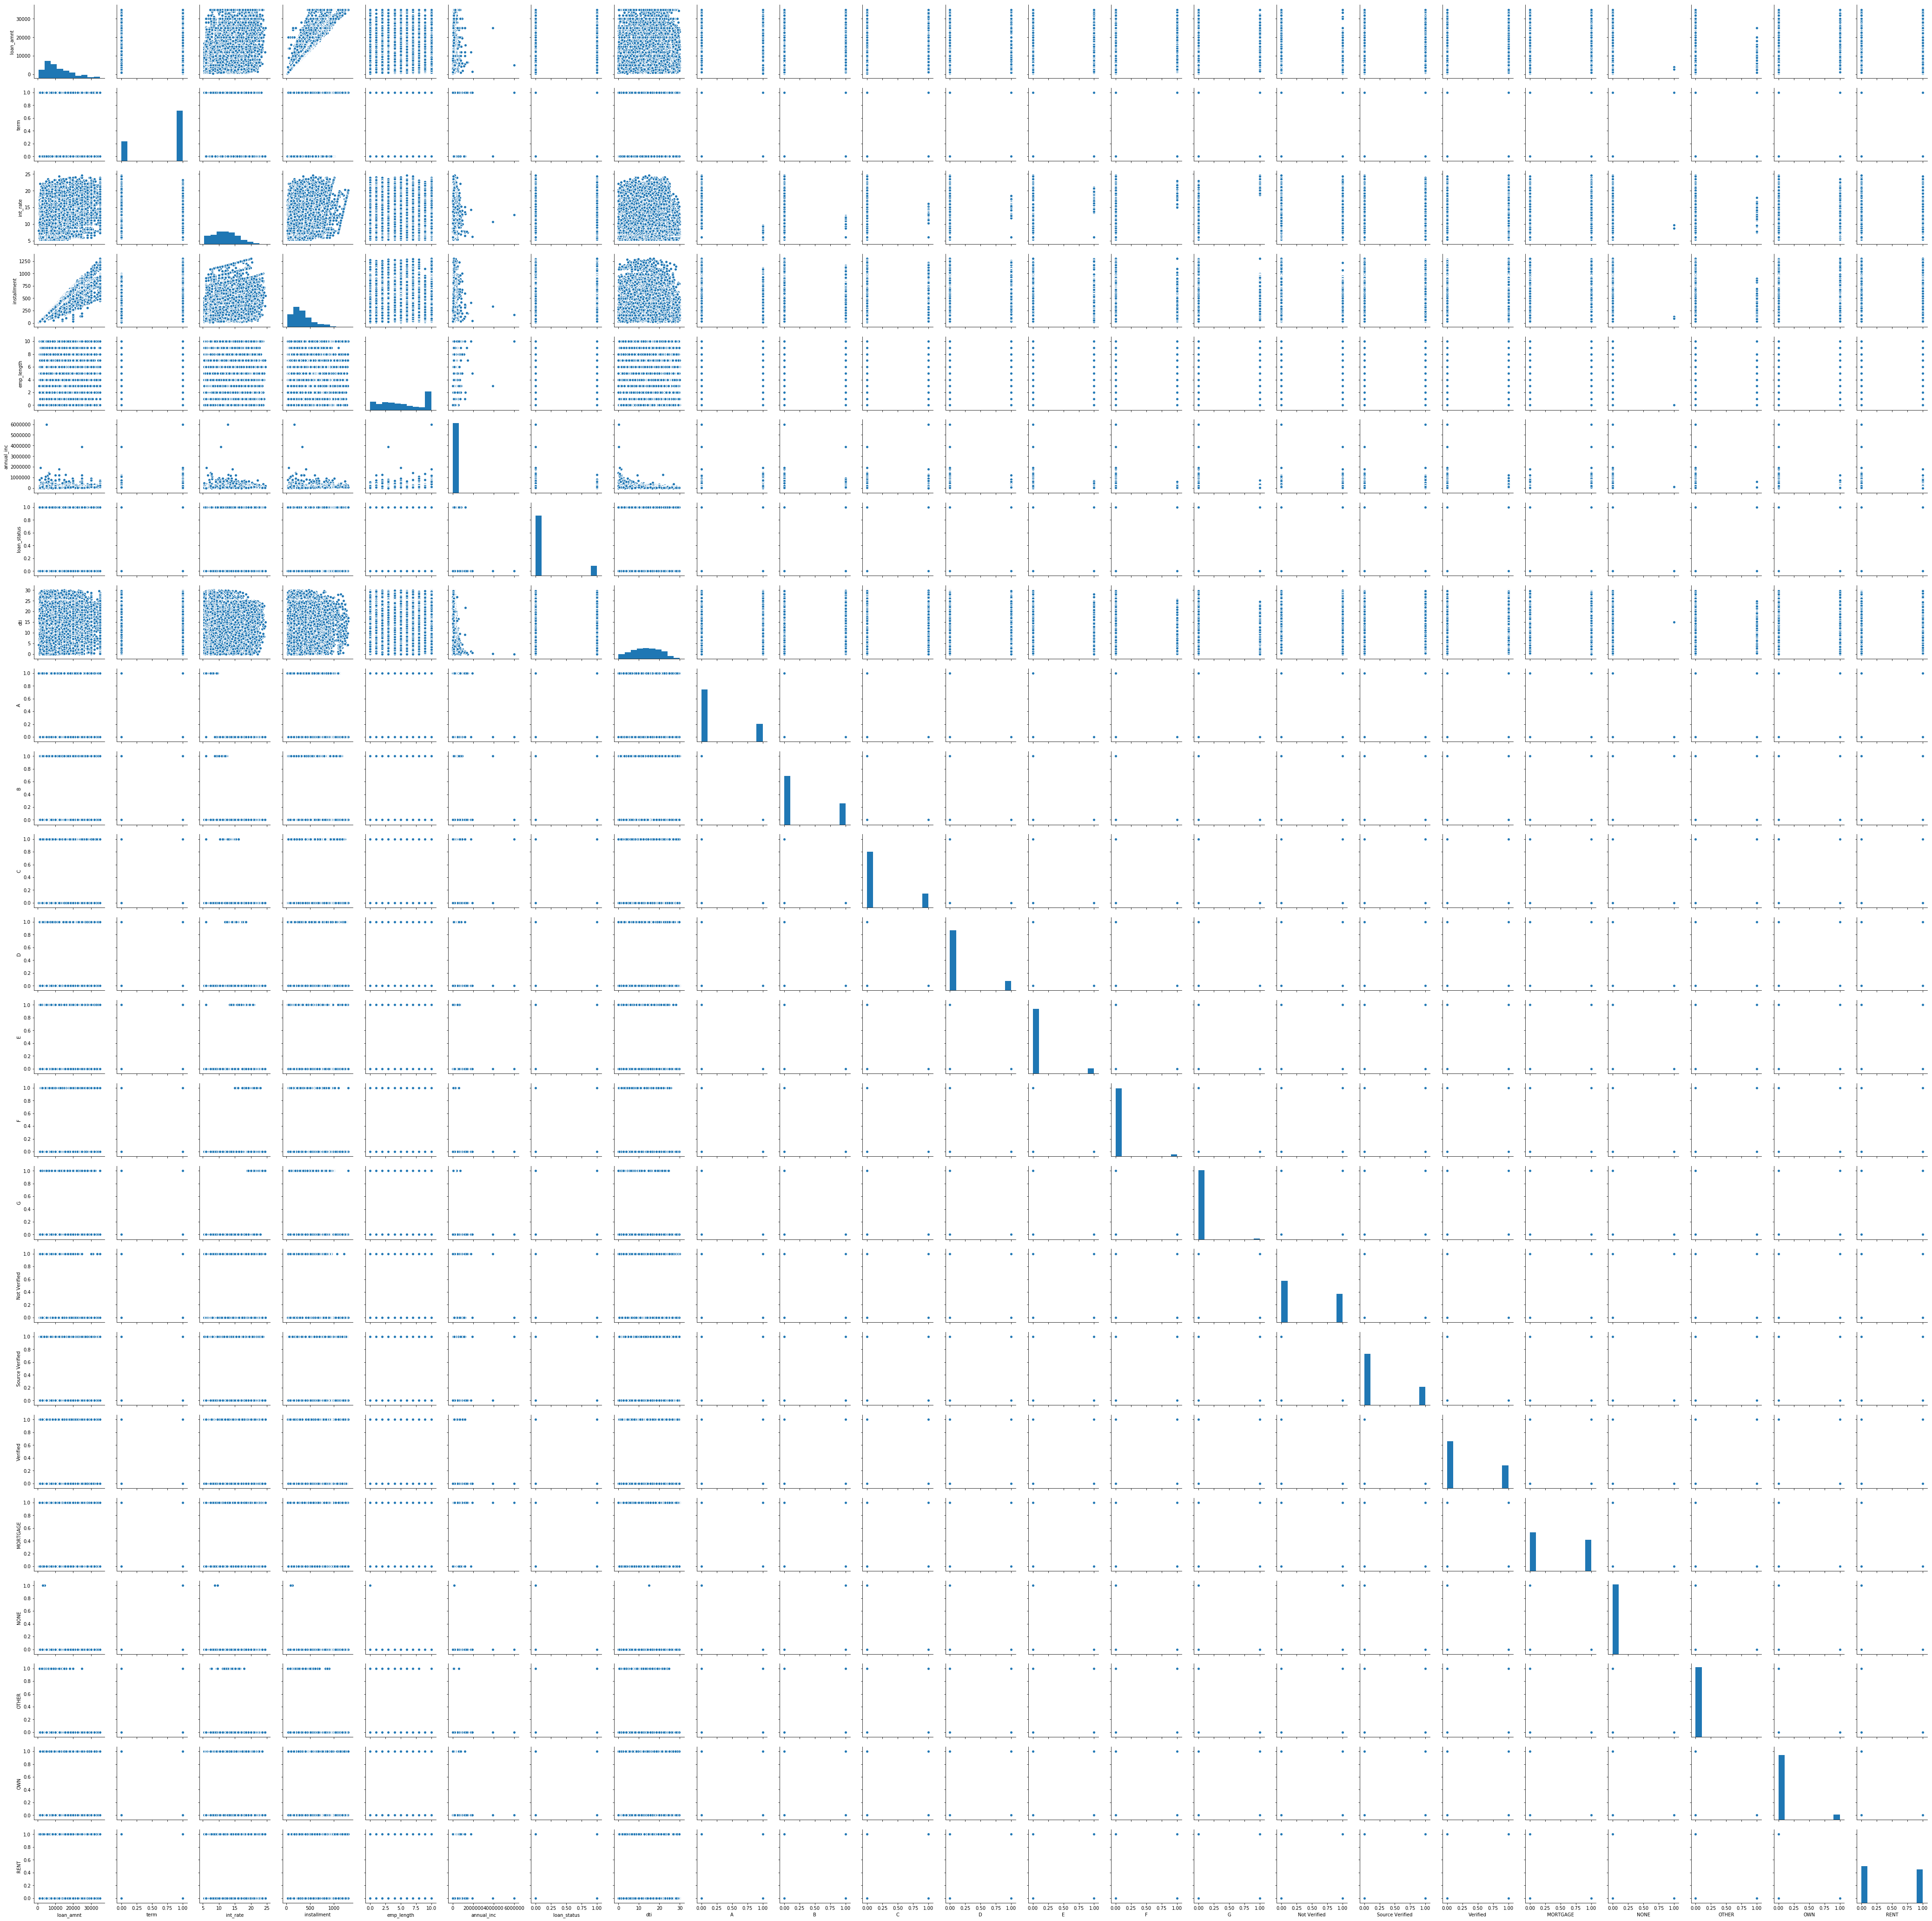

In [636]:
sns.pairplot(Loan_copy)